¡Hola, Emanuel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Emmanuel! Has hecho un excelente trabajo con el proyecto, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas d ehipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de math para hacer el redondeo con otros métodos

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

megaline_calls = pd.read_csv("/datasets/megaline_calls.csv")

megaline_internet = pd.read_csv("/datasets/megaline_internet.csv")

megaline_messages = pd.read_csv("/datasets/megaline_messages.csv")

megaline_plans = pd.read_csv("/datasets/megaline_plans.csv")

megaline_users = pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
print(megaline_calls.head(),"\n")
print(megaline_internet.head(), "\n")
print(megaline_messages.head(), "\n")
print(megaline_plans.head(), "\n")
print(megaline_users.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22 

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22 

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26 

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0 

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Tal vez el unico error que pueda ser sea el nombre de la oolumna "usd_monthly_pay" ya que en la descripcion del proyecto tiene otro nombre que es "usd_monthly_fee"" lo que puede que sea irrelevante pero creo que es mejor cambiarlo para evitar futuros errores en el futuro.**

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
New_name_column = {"usd_monthly_pay": "usd_monthly_fee"}

megaline_plans.rename(columns= New_name_column, inplace=True)

megaline_plans['mb_per_month_included'] = megaline_plans['mb_per_month_included'] / 1024

megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

**Hicimos el cambio de nombre de columna porque en la descripcion de DataFrame tiene otro nombre y por lo que creo que debia cambiarse es para un mejor entendimiento de las columnas.**

**Tambien convertimos los MB de la columna "mb_per_month_included" a GB para un mejor entedimiento de los plan "surf" y "ultimate".**

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Lo que puedo observar es que no hay ningun error salvo los valores ausentes de la columna "churn_date" pero ya sabemos el porque estan esos valores por lo que creo que podemos hacer algo para que nuestro DataFrame no contenga valores ausentes.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
megaline_users["reg_date"] = pd.to_datetime(megaline_users['reg_date'], format="%Y-%m-%d")

megaline_users.fillna("2018/12/31", inplace=True)

megaline_users["churn_date"] = pd.to_datetime(megaline_users["churn_date"], format="%Y-%m-%d")

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

**Para evitar tener errores con los valores ausentes en el futuro, opte por cambiarlos por una fecha que podamos entender que esos usuarios dejaron de usar el servicio, ademas de que creo podemos hacer un mejor analisis gracias a este cambio.**

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Lo que veo es que el unico error es el tipo de datos de la columna "call_date" ya que son de tipo object por lo que debemos de cambiarlos al tipo de datos datetime, ya que este cambio nos podria facilitar el analisis.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
megaline_calls["call_date"] = pd.to_datetime(megaline_calls['call_date'], format="%Y-%m-%d")

megaline_calls['duration'] = np.ceil(megaline_calls["duration"])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

**Según lo que vemos en las descripcion del dataset de las tarifas se nos aclara que toda llamada individual se redondea incluso si es de un solo segundo, por lo que decidimos redondear para poder hacer un mejor analisis.**

**Asi que ahora toda llamada esta sin decimales gracias a que redondeamos.**

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Mensajes

In [13]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprime una muestra de datos para los mensajes
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Lo que veo es que aqui es que la columa "message_id" contiene datos de tipo object pero debemos cambiarlos a datos de tipo datetime ya que los valores de la columna son fechas por lo este cambio nos ayudara a darnos un mejor analisis.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format="%Y-%m-%d")

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

**Lo mismo me pasa aqui no veo nada que pueda agregar porque creo que el DataFrame ya esta en buenas condiciones para poder trabajar con el.**

## Internet

In [16]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Lo unico que veo aqui es un error de tipo de datos en la columna "session_date" ya que es de tipo object pero como es una fecha creo que debemos cambiarlas a datos de tipo datetime para poder hacer un mejor analisis.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format="%Y-%m-%d")

New_name_column = {"mb_used": "gb_used"}

megaline_internet.rename(columns=New_name_column, inplace=True)

megaline_internet['gb_used'] = np.ceil(megaline_internet['gb_used'] / 1024)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

**.**

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [19]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [20]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
megaline_calls["month"] = megaline_calls['call_date'].dt.month

number_call_of_users = megaline_calls.groupby(["month","user_id"])["user_id"].count().reset_index(name="number_calls")

number_call_of_users.head()

,month,user_id,number_calls
0,1,1042,18
1,1,1077,42
2,1,1185,23
3,1,1196,42
4,1,1214,5



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [21]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
megaline_calls["month"] = megaline_calls["call_date"].dt.month

minutes_of_users = megaline_calls.groupby(["month","user_id"])["duration"].sum().reset_index()

minutes_of_users.head()

,month,user_id,duration
0,1,1042,114.0
1,1,1077,290.0
2,1,1185,181.0
3,1,1196,287.0
4,1,1214,16.0


In [22]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
megaline_messages["month"] = megaline_messages["message_date"].dt.month

number_of_messa_users = megaline_messages.groupby(["month","user_id"])["id"].count().reset_index(name="messages_count")

number_of_messa_users.head()

,month,user_id,messages_count
0,1,1077,37
1,1,1196,23
2,1,1214,2
3,1,1362,21
4,2,1028,12


In [23]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
megaline_internet["month"] = megaline_internet["session_date"].dt.month

volume_trafic_of_users = megaline_internet.groupby(["month","user_id"])["gb_used"].sum().reset_index()

volume_trafic_of_users.head()

,month,user_id,gb_used
0,1,1042,7.0
1,1,1077,22.0
2,1,1185,21.0
3,1,1196,14.0
4,1,1214,4.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [24]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

first_merge = number_call_of_users.merge(minutes_of_users, on=["month","user_id"])

second_merge = number_of_messa_users.merge(volume_trafic_of_users, on=["month", "user_id"])

third_merge = first_merge.merge(second_merge, on=["month","user_id"])

final_merge = third_merge.merge(megaline_users , on="user_id")

final_merge_april = final_merge[final_merge["month"] == 4]

final_merge_april[["user_id", "number_calls", "duration", "messages_count", "gb_used", "plan", "month"]].head()

,user_id,number_calls,duration,messages_count,gb_used,plan,month
3,1077,95,746.0,57,38.0,ultimate,4
15,1196,73,493.0,30,47.0,ultimate,4
27,1214,61,466.0,13,55.0,ultimate,4
39,1362,95,643.0,42,27.0,surf,4
50,1099,72,528.0,15,45.0,surf,4


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [25]:
# Añade la información de la tarifa
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [26]:
# Calcula el ingreso mensual para cada usuario
def income_for_plan(row):
    if row["plan"] == "surf":
        extra_minutes = max(0, row["duration"] - 500)
        extra_messages = max(0, row["messages_count"] - 50)
        extra_GB = max(0, row["gb_used"] - 15)
        return 20 + (extra_minutes * 0.03) + (extra_messages * 0.03) + (extra_GB * 10)
    else:
        extra_minutes = max(0, row["duration"] - 3000)
        extra_messages = max(0, row["messages_count"] - 1000)
        extra_GB = max(0, row["gb_used"] - 30)
        return 70 + (extra_minutes * 0.01) + (extra_messages * 0.01) + (extra_GB * 7)


final_merge["income_for_plan"]  = final_merge.apply(income_for_plan, axis=1)


final_merge[["user_id", "number_calls", "duration", "messages_count", "gb_used", "reg_date", "plan", "income_for_plan", 'month']].head()

,user_id,number_calls,duration,messages_count,gb_used,reg_date,plan,income_for_plan,month
0,1077,42,290.0,37,22.0,2018-01-14,ultimate,70.0,1
1,1077,111,776.0,67,39.0,2018-01-14,ultimate,133.0,2
2,1077,107,711.0,72,38.0,2018-01-14,ultimate,126.0,3
3,1077,95,746.0,57,38.0,2018-01-14,ultimate,126.0,4
4,1077,85,655.0,77,44.0,2018-01-14,ultimate,168.0,5


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

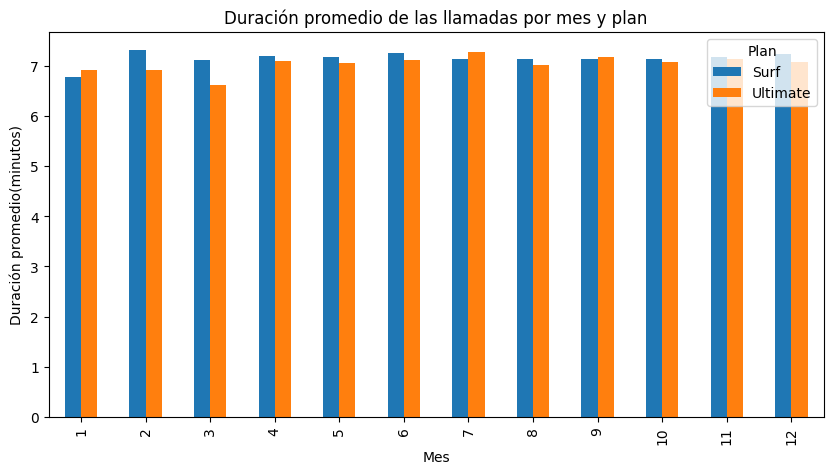

In [27]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
merge_calls_and_users = megaline_calls.merge(megaline_users, on="user_id")

surf_plan = merge_calls_and_users[merge_calls_and_users['plan'] == "surf"].sort_values(by="month")
ultimate_plan = merge_calls_and_users[merge_calls_and_users['plan'] == "ultimate"].sort_values(by="month")

mean_surf_plan = surf_plan.groupby("month")["duration"].mean()
mean_ultimate_plan =  ultimate_plan.groupby("month")["duration"].mean()

mean_calls_by_plan = pd.DataFrame({"Surf": mean_surf_plan,
                      "Ultimate": mean_ultimate_plan})

mean_calls_by_plan.plot(kind="bar",
                        title="Duración promedio de las llamadas por mes y plan",
                       xlabel="Mes",
                       ylabel="Duración promedio(minutos)",
                        figsize=[10,5]
                       )
plt.legend(title="Plan")
plt.show()

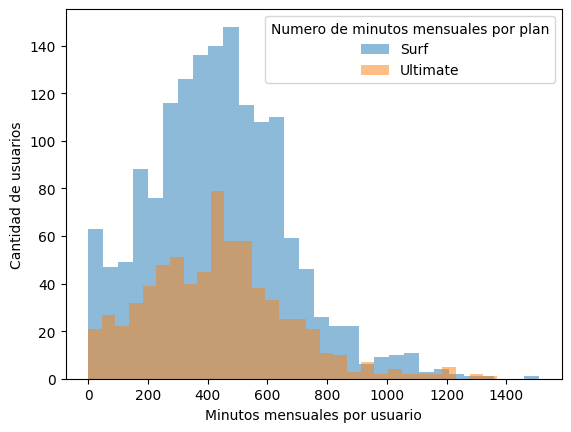

In [28]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
group = merge_calls_and_users.groupby(["month","plan","user_id"])["duration"].sum().reset_index()

group_surf_plan = group[group["plan"] == "surf"]
group_ultimate_plan = group[group["plan"] == "ultimate"]

group_surf_plan["duration"].plot(kind="hist",
                                alpha=0.5,
                                bins=30)

group_ultimate_plan['duration'].plot(kind="hist",
                                     alpha=0.5,
                                    bins=30)

plt.xlabel("Minutos mensuales por usuario")
plt.ylabel("Cantidad de usuarios")
plt.legend(["Surf", "Ultimate"], title="Numero de minutos mensuales por plan")
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [29]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_of_calls = megaline_calls.groupby("month")["duration"].mean()

var_of_calls = megaline_calls.groupby("month")["duration"].var()

print("Media de la duracion mensual de llamadas:","\n",
      mean_of_calls, "\n")
print("Varianza de la duracion mensual de las llamadas", "\n",
      var_of_calls)

Media de la duracion mensual de llamadas: 
 month
1     6.860465
2     7.099483
3     6.938889
4     7.161825
5     7.140292
6     7.209707
7     7.171995
8     7.090508
9     7.140713
10    7.103304
11    7.153503
12    7.186385
Name: duration, dtype: float64 

Varianza de la duracion mensual de las llamadas 
 month
1     34.085679
2     35.432522
3     33.831347
4     34.352474
5     35.895387
6     35.996164
7     35.166741
8     35.215003
9     35.822651
10    35.292561
11    35.382278
12    35.602930
Name: duration, dtype: float64


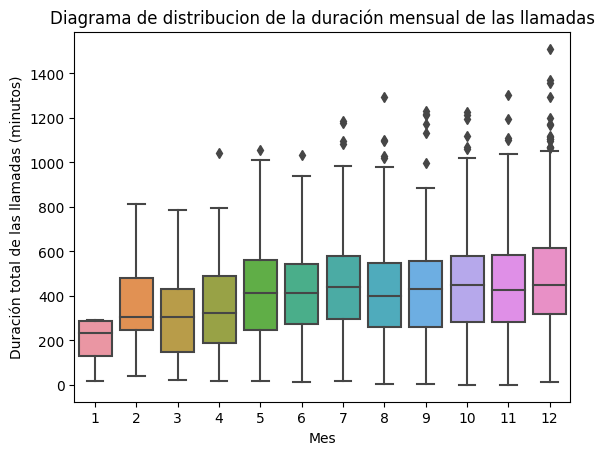

In [30]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
month = megaline_calls.groupby(["month", "user_id"])["duration"].sum().reset_index()

sns.boxplot(data=month,
           x="month",
            y='duration'
           )

plt.title("Diagrama de distribucion de la duración mensual de las llamadas")
plt.xlabel("Mes")
plt.ylabel("Duración total de las llamadas (minutos)")
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Gracias a los datos, graficos, medias y varianza podemos decir que el comportamiento no varia en funcion al plan.**

**Ya que si observamos el grafico de la duracion promedio de las llamadas por plan podemos observar que son bastante parecidas, lo que nos lleva a que el comportamiento de los planes no va en funcion a el plan.**

**Otra observacion que note fue que en el histograma la mayor cantidad de usuarios usan de 400 a 600 minutos en el plan surf, lo que me lleva a pensar en que el plan surf posiblemente genere mas ingresos por numero de usuarios.**

**Tambien podemos decir que los datos no son para nada inconsistentes gracias a la media y varianza que sacamos por lo que creo que esto otra vez afirma lo del plan surf puede que sea el plan que genere mas ingrensos.**

**Por lo que vemos en el diagrama de caja es que a inicios del año (Enero) empezamos con una mediana de un poco arriba de 200 minutos de duración de las llamdas y conforme avanzan los meses podemos ver que la mediana aumenta hasta llegar a finales de año (Diciembre) con una mediana de casi 400 minutos de duracion de las llamadas.**

### Mensajes

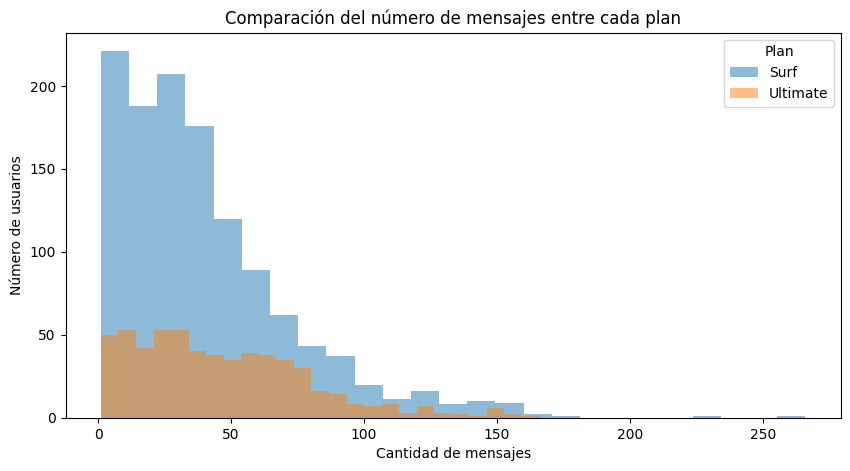

In [31]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
month_messages = megaline_messages.groupby(["month", "user_id"])["id"].count().reset_index(name="messages_count")

merge_month_messa_and_users = month_messages.merge(megaline_users, on="user_id")

surf_plan = merge_month_messa_and_users[merge_month_messa_and_users['plan'] == "surf"]
ultimate_plan = merge_month_messa_and_users[merge_month_messa_and_users["plan"] == "ultimate"]


surf_plan["messages_count"].plot(kind="hist",
                                 bins=25,
                                 figsize=[10,5],
                                 alpha=0.5
                                )
ultimate_plan["messages_count"].plot(kind="hist",
                                     bins=25,
                                     figsize=[10,5],
                                     alpha=0.5
                                    )
plt.title("Comparación del número de mensajes entre cada plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Número de usuarios")
plt.legend( ["Surf","Ultimate"], title="Plan")
plt.show()

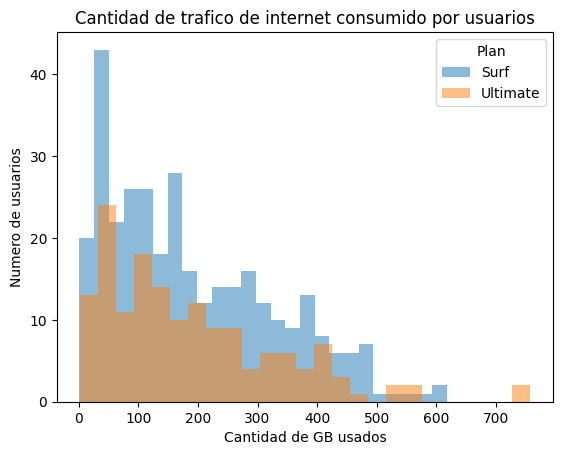

In [32]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
trafic_month = volume_trafic_of_users.groupby(["month","user_id"])["gb_used"].sum().reset_index()

total_month = trafic_month.groupby("user_id")["gb_used"].sum().reset_index()

merge_trafic_and_users = total_month.merge(megaline_users, on="user_id")

surf_plan = merge_trafic_and_users[merge_trafic_and_users["plan"] == "surf"]
ultimate_plan = merge_trafic_and_users[merge_trafic_and_users["plan"] == "ultimate"]

surf_plan["gb_used"].plot(kind="hist",
                         alpha=0.5,
                         bins=25)

ultimate_plan["gb_used"].plot(kind="hist",
                             alpha=0.5,
                             bins=25)

plt.title("Cantidad de trafico de internet consumido por usuarios")
plt.xlabel("Cantidad de GB usados")
plt.ylabel("Numero de usuarios")
plt.legend(["Surf", "Ultimate"], title="Plan")
plt.show()

**Por lo que vemos en los graficos todo esto apunta a que el plan surf tiene una mayor cantidad de usuarios, por lo que  esto nos puede que indicar a que el plan surf realmente sea el plan que genere mayores ingresos por numeros de usuarios.**

**Tambien vemos que en el plan ultimate son pocos los usuarios que superan los limites del plan surf y demasiado escasos los que superan los limites de este plan, por lo que algo me dice que el plan ultimate no sea tan bueno respecto al plan surf o tal vez simplemente los usuarios no aprovechan el plan ultimate.**

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

**Que tengo que hacer aqui no me especifican si tu puedes decirme ayudarias mucho :)**

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Hola, Emanuel! Para este punto y el que sigue debemos de hacer de igualemnte un análisis gráfico que compare las variable de internet y la de ingreso por tipo de plan. Con este ajuste puedes continuar con las pruebas de hipótesis

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

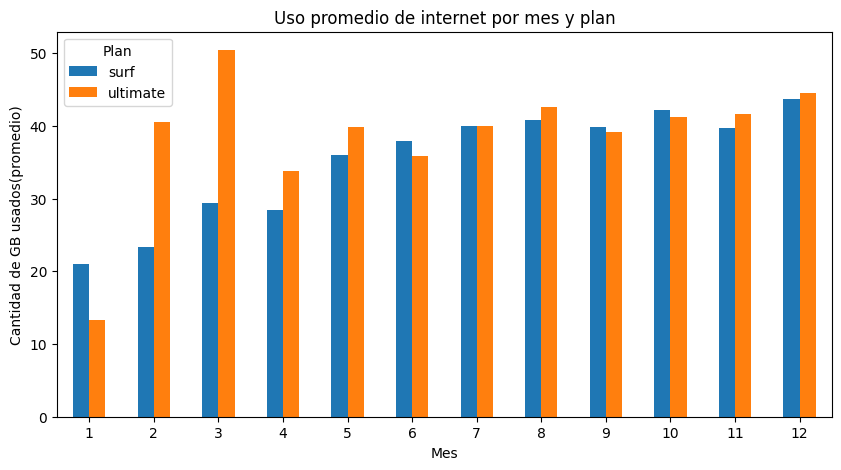

In [33]:
group_internet = final_merge.groupby(["month", "plan" ])["gb_used"].mean().unstack()

group_internet.plot(kind="bar",
                   figsize=[10, 5 ],
                   rot=0  
                   )

plt.title("Uso promedio de internet por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Cantidad de GB usados(promedio)")
plt.legend(title="Plan")
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Como podemos ver en el grafico comparativo por planes podemos decir que sus promedios de ambos planes son bastante parecidos, tambien podemos ver en algunos meses el plan ultimate sobrepasa con creces al plan surf.**

**Por lo que podemos decir que el comportamiento no va en funcion de acuerdo al plan.**

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

**Lo mismo aqui me seria de mucha ayuda si me dicen que tengo que hacer**

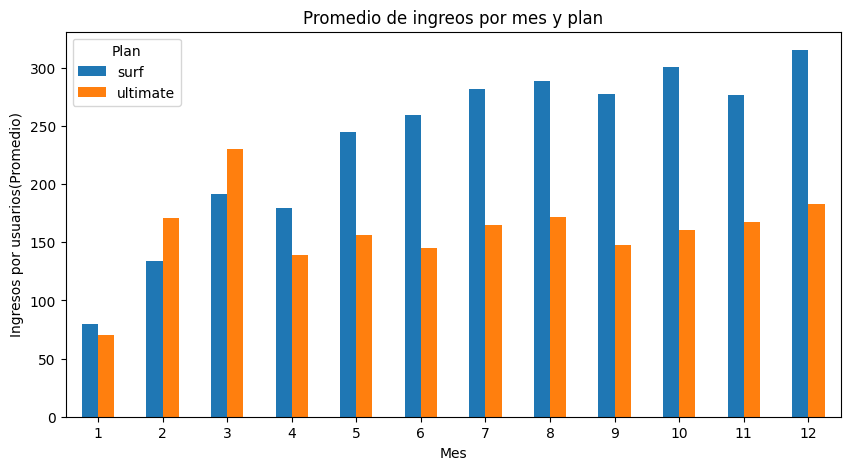

In [34]:
group_income_for_plan = final_merge.groupby(["month", "plan"])["income_for_plan"].mean().unstack()

group_income_for_plan.plot(kind="bar",
                          figsize=[10, 5],
                          rot=0
                          )
plt.title("Promedio de ingreos por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Ingresos por usuarios(Promedio)")
plt.legend(title="Plan")
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Por lo que vemos en los graficos el plan que mayor ingresos genera el plan Surf, talvez esto se deba a que los usuarios superaron los limites y terminaron pagando mas o simplemente el plan surf contiene mas usuarios a diferencia del ultimate.**

**Por lo que podemos decir que su comportamiento no va en  funcion del plan.**

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [35]:
# Prueba las hipótesis

plan_surf_income = final_merge[final_merge['plan'] == "surf"]["income_for_plan"]
plan_ultimate_income = final_merge[final_merge['plan'] == "ultimate"]["income_for_plan"]

results = st.ttest_ind(
    plan_surf_income,
    plan_ultimate_income,
    equal_var=False
)

alpha = 0.05

print("Valor p:", results.pvalue)
print("Alpha:", alpha)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula (hay evidencia de diferencia)")
else:
    print("No podemos rechazar la hipótesis nula (no hay evidencia suficiente)")

Valor p: 1.005225561054736e-81
Alpha: 0.05
Rechazamos la hipótesis nula (hay evidencia de diferencia)


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [36]:
# Prueba las hipótesis

Area_Newyork = final_merge[final_merge['city'] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]["income_for_plan"]
Other_areas = final_merge[final_merge['city'] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]["income_for_plan"]

alpha=0.05

results = st.ttest_ind(
    Area_Newyork,
    Other_areas,
    equal_var=False)

print("Valor p:",results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipotises nula (hay evidencia de diferencia)")
else:
    print("No podemos rechazar la hipotesis nula (no hay evidencia suficiente)")

Valor p: 0.20786207648480143
No podemos rechazar la hipotesis nula (no hay evidencia suficiente)


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**Me falta hacer los demas problemas pero no puedo porque no me dicen que tengo que hacer asi que por lo mientras hare solo esta suposición**

**La unica conclusion que puedo dar es solo una suposicion, ya que e observado los datos y por lo que e visto la mayoria de los usuarios terminan yendose, pero son los que mas GB, SMS o minutos que generan por lo que me hace pensar que los planes no ofrecen beneficios atractivos o son demasiado caros.**

**1.-Gracias a las graficas y otros analisis hemos comprobado que el plan surf es el que genera mas ingresos por mes que a diferencia del plan ultimate este no genera tantos ingresos.**  

**2.- Como ya hemos visto en las graficas los planes no actuan en funcion de su comportamiento ya que hemos visto al plan surf tener un promedio similar al del plan ultimate en duracion de las llamadas o uso del internet.**

**3.- Tambien anadimos la informacion vista en el grafico de ingresos por medio de cada plan, ademas de que gracias a las diferencias significativas que obtuvimos de nuestra prueba de hipotesis podemos decir que los planes no van en funcion de su comportamiento.**

**4.-Tambien a resaltar que gracias al diagrama de caja vimos que los usuarios aumentan con el tiempo su consumo de minutos, por que talvez aqui sea la parte donde los usuarios excedan los limites de los planes surf y ultimate.**

**5.-Por lo que el plan surf es le plan que mas ingresos genera, talvez se deba a mayor cantidad de usuarios o simplemente por que los usuarios se pasan de los limtes del plan.**